In [1]:
#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [2]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('petrol_consumption.csv')

In [5]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
X = dataset.iloc[:, 0:4].values # Atributes
y = dataset.iloc[:, 4].values   # Labels

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234


In [26]:
def run_regression(n) :
    regressor = RandomForestRegressor(n_estimators=n, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [39]:
rmse=[]
for n in [5,10,20,50,100,200,400]:
    rmse.append([n,run_regression(n)])

<AxesSubplot:xlabel='0'>

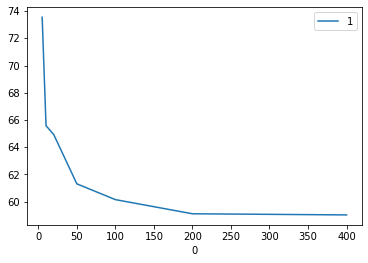

In [40]:
pd.DataFrame(rmse).plot(x=0,y=1)

In [42]:
# Part 2: Using Random Forest for Classification

In [43]:
dataset = pd.read_csv("bill_authentication.csv")

In [44]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [45]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091
